In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [8]:
data_frame = pd.read_csv("data/train.csv")
data_frame.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
# fill missing data for age
data_frame["Age"].fillna(data_frame["Age"].mean(), inplace=True)
# convert to numeric
mapping = {"male": 0, "female": 1}
data_frame["Sex"] = data_frame["Sex"].replace(mapping.keys(), mapping.values())

In [26]:
def autolabel(ax, rects, percentages, font_size=14):

    for i, rect in enumerate(rects):
        height = rect.get_height()
        ax.annotate(
            "{}%".format(percentages[i]),
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 3),
            textcoords="offset points",
            ha="center",
            va="bottom",
            fontsize=font_size,
        )

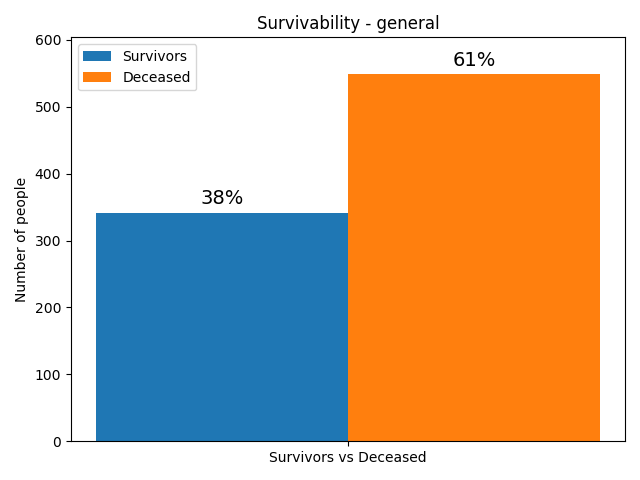

In [27]:
def plot_survivors_vs_deceased(data_frame):
    data = data_frame["Survived"].values
    survivors_num = (data == 1).sum()
    deceased_num = (data == 0).sum()

    labels = ["Survivors vs Deceased"]

    x = np.arange(len(labels))
    width = 0.5

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width / 2, [survivors_num], width, label="Survivors")
    rects2 = ax.bar(x + width / 2, [deceased_num], width, label="Deceased")

    ax.set_ylabel("Number of people")
    ax.set_title("Survivability - general")
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylim([None, 1.1 * max(survivors_num, deceased_num)])
    ax.legend()

    percentage_1 = [int(survivors_num * 100 / (survivors_num + deceased_num))]
    percentage_2 = [int(deceased_num * 100 / (survivors_num + deceased_num))]

    autolabel(ax, rects1, percentage_1)
    autolabel(ax, rects2, percentage_2)

    fig.tight_layout()
    plt.show()
    
plot_survivors_vs_deceased(data_frame)

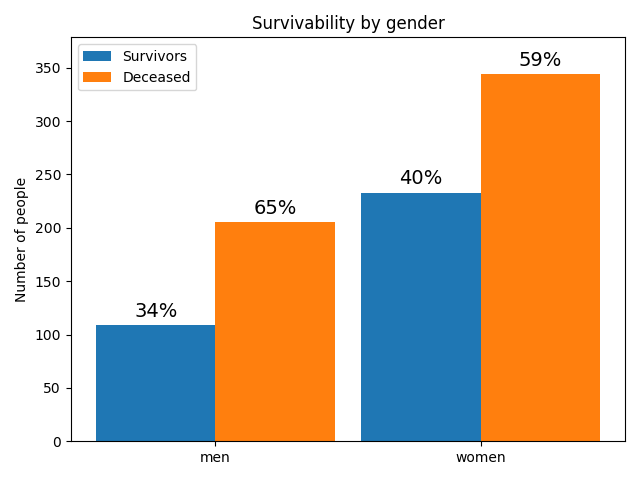

In [28]:
def plot_survivability_by_gender(data_frame):

    survivors_data = data_frame["Survived"].values
    gender_data = data_frame["Sex"].values
    males_num = (gender_data == 1).sum()
    females_num = (gender_data == 0).sum()

    survived_males = 0
    survived_females = 0

    for survived, sex in zip(survivors_data, gender_data):
        if survived and sex == 0:
            survived_males += 1

        elif survived and sex == 1:
            survived_females += 1

    deceased_males = males_num - survived_males
    deceased_females = females_num - survived_females

    labels = ["men", "women"]

    x = np.arange(len(labels))
    width = 0.45

    fig, ax = plt.subplots()
    rects1 = ax.bar(
        x - width / 2, [survived_males, survived_females], width, label="Survivors"
    )
    rects2 = ax.bar(
        x + width / 2, [deceased_males, deceased_females], width, label="Deceased"
    )

    ax.set_ylabel("Number of people")
    ax.set_title("Survivability by gender")
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylim(
        [
            None,
            1.1
            * max(
                survived_males, survived_females, deceased_males, deceased_females
            ),
        ]
    )
    ax.legend()

    percentage_1 = [
        int(survived_males * 100 / (males_num)),
        int(survived_females * 100 / (females_num)),
    ]
    percentage_2 = [
        int(deceased_males * 100 / (males_num)),
        int(deceased_females * 100 / (females_num)),
    ]

    autolabel(ax, rects1, percentage_1)
    autolabel(ax, rects2, percentage_2)

    fig.tight_layout()
    plt.show()
    
plot_survivability_by_gender(data_frame)

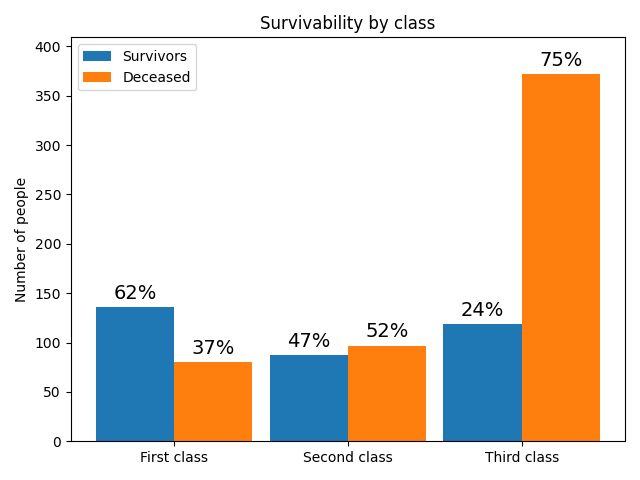

In [29]:
def plot_survivability_by_class(data_frame):

    survivors_data = data_frame["Survived"].values
    class_data = data_frame["Pclass"].values
    first_class_total = (class_data == 1).sum()
    second_class_total = (class_data == 2).sum()
    third_class_total = (class_data == 3).sum()

    survived_first_class = 0
    survived_second_class = 0
    survived_third_class = 0

    for survived, pclass in zip(survivors_data, class_data):
        if survived and pclass == 1:
            survived_first_class += 1

        elif survived and pclass == 2:
            survived_second_class += 1

        elif survived and pclass == 3:
            survived_third_class += 1

    deceased_first_class = first_class_total - survived_first_class
    deceased_second_class = second_class_total - survived_second_class
    deceased_third_class = third_class_total - survived_third_class

    survived_by_class = [
        survived_first_class,
        survived_second_class,
        survived_third_class,
    ]
    deceased_by_class = [
        deceased_first_class,
        deceased_second_class,
        deceased_third_class,
    ]
    labels = ["First class", "Second class", "Third class"]

    x = np.arange(len(labels))
    width = 0.45

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width / 2, survived_by_class, width, label="Survivors")
    rects2 = ax.bar(x + width / 2, deceased_by_class, width, label="Deceased")

    ax.set_ylabel("Number of people")
    ax.set_title("Survivability by class")
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylim([None, 1.1 * max(max(survived_by_class), max(deceased_by_class))])
    ax.legend()

    percentage_1 = [
        int(survived_first_class * 100 / (first_class_total)),
        int(survived_second_class * 100 / (second_class_total)),
        int(survived_third_class * 100 / (third_class_total)),
    ]
    percentage_2 = [
        int(deceased_first_class * 100 / (first_class_total)),
        int(deceased_second_class * 100 / (second_class_total)),
        int(deceased_third_class * 100 / (third_class_total)),
    ]

    autolabel(ax, rects1, percentage_1)
    autolabel(ax, rects2, percentage_2)

    fig.tight_layout()
    plt.show()
    
plot_survivability_by_class(data_frame)

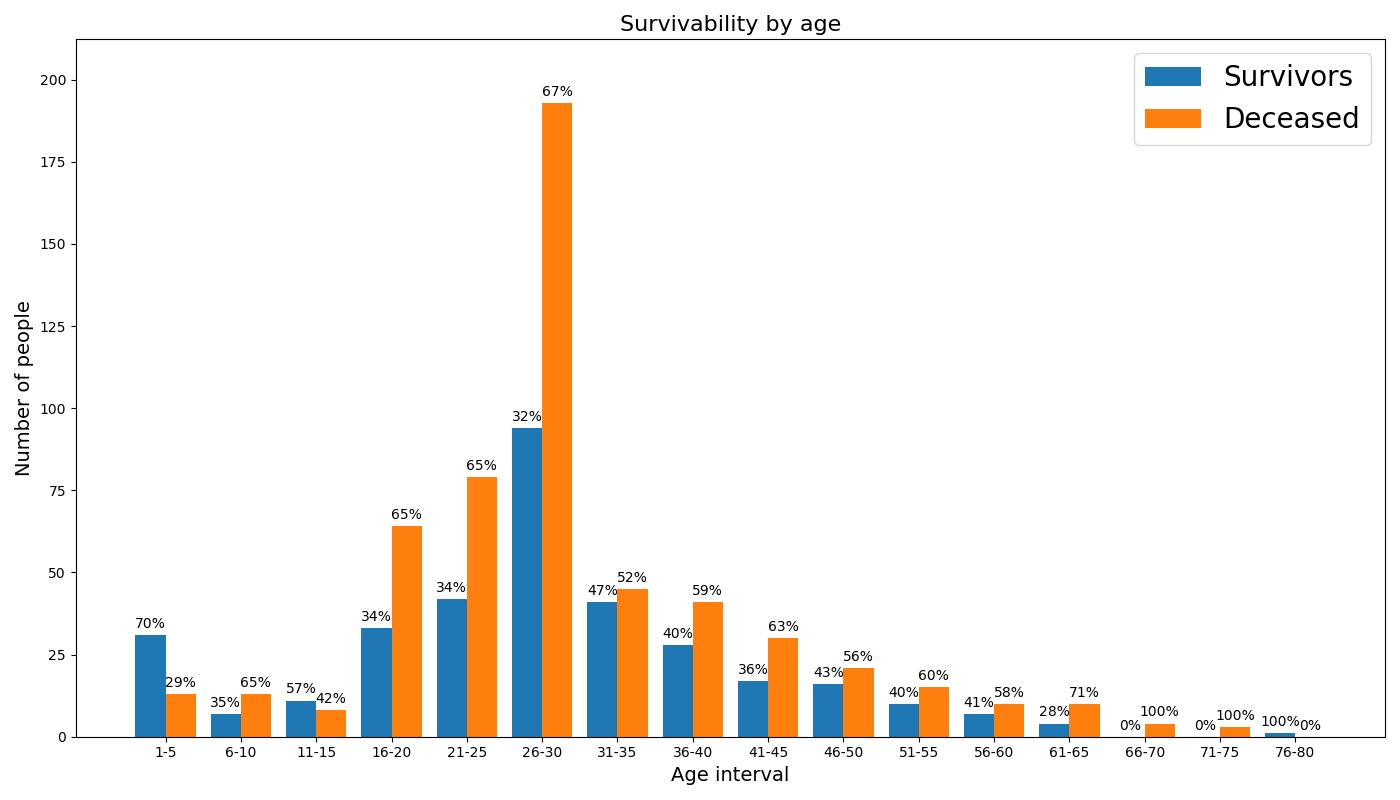

In [31]:
def plot_survivability_by_age(data_frame):

    survivors_data = data_frame["Survived"].values
    data_frame["Age"] = data_frame["Age"].astype(int)
    age_data = data_frame["Age"].values

    max_age = max(age_data)

    n = 5
    upper_limit = max_age + max_age % n + 1

    total_for_age_interval = {
        i: (age_data <= i).sum() for i in range(n, upper_limit, n)
    }

    for age_interval in range(upper_limit - 1, n, -n):
        total_for_age_interval[age_interval] -= total_for_age_interval[
            age_interval - n
        ]

    age_to_age_interval = {
        i + n * j + 1: (j + 1) * n
        for j in range(upper_limit // n)
        for i in range(n)
    }
    age_to_age_interval[0] = n

    survivors_for_age_interval = {
        age_interval: 0 for age_interval in total_for_age_interval
    }

    for survived, age in zip(survivors_data, age_data):

        age_interval = age_to_age_interval[age]

        if survived:
            survivors_for_age_interval[age_interval] += 1

    deceased_for_age_interval = {
        age_interval: total - survivors_for_age_interval[age_interval]
        for age_interval, total in total_for_age_interval.items()
    }

    labels = [str(i - n + 1) + "-" + str(i) for i in range(n, upper_limit, n)]

    x = np.arange(len(labels))
    width = 0.4

    fig, ax = plt.subplots(figsize=(14, 8))

    rects1 = ax.bar(
        x - width / 2, survivors_for_age_interval.values(), width, label="Survivors"
    )
    rects2 = ax.bar(
        x + width / 2, deceased_for_age_interval.values(), width, label="Deceased"
    )

    ax.set_title("Survivability by age", fontsize=16)
    ax.set_ylabel("Number of people", fontsize=14)
    ax.set_xlabel("Age interval", fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylim([None, 1.1 * max(deceased_for_age_interval.values())])
    ax.legend(prop={"size": 20})

    percentages_1 = [
        int(survivors_for_age_interval[age_interval] * 100 / total)
        for age_interval, total in total_for_age_interval.items()
    ]
    percentages_2 = [
        int(deceased_for_age_interval[age_interval] * 100 / total)
        for age_interval, total in total_for_age_interval.items()
    ]

    autolabel(ax, rects1, percentages_1, 10)
    autolabel(ax, rects2, percentages_2, 10)

    fig.tight_layout()
    plt.show()

plot_survivability_by_age(data_frame)

In [33]:
corr = data_frame.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.033741,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.067809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.335071,0.083081,0.018443,-0.549500
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.082533,0.114631,0.245489,0.182333
Age,0.033741,-0.067809,-0.335071,-0.082533,1.000000,-0.232743,-0.176744,0.093856
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.232743,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,0.245489,-0.176744,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.182333,0.093856,0.159651,0.216225,1.000000


In [ ]:
def plot_correlation_matrix(data_frame: pd.DataFrame, collumn_names: List[str]) -> None:
    """
    Plots a correlation matrix for a given list of columns.

    :param data_frame: the data frame holding the data
    :param collumn_names: the columns to plot
    """
    temp_df = data_frame[collumn_names]
    temp_df = temp_df.dropna()
    corr = temp_df.corr()
    fig, ax = plt.subplots()
    ax.matshow(corr)
    ax.set_xticks(range(len(corr.columns)))
    ax.set_yticks(range(len(corr.columns)))
    ax.set_xticklabels(corr.columns, rotation=90)
    ax.set_yticklabels(corr.columns)
    plt.show()


plot_correlation_matrix(df, ["Survived", "Sex", "Age",)

